In [1]:
# Importação das bibliotecas para analise e manipluação de dados

import pandas as pd                                                # Analise e tratamento de dados
import numpy as np                                                 # Tratamento de dados numéricos
import random                                                      # Gerador de números aleatórios
import matplotlib.pyplot as plt                                    # Plotagem de gráficos
import seaborn as sns                                              # Plotagem de gráficos
from sklearn.model_selection import train_test_split               # Divisão de conjuntos de dados de treino e teste
from sklearn.naive_bayes import GaussianNB                         # Algoritmo Naive Bayes
from sklearn.metrics import confusion_matrix, accuracy_score       # Matriz de confusão e métricas de precisão e acurácia
from imblearn.under_sampling import TomekLinks                     # Subamostragem aleatória (undersampling)
from imblearn.over_sampling import SMOTE                           # Sobreamostragem aleatória (OverSampling)


In [2]:
# Etapas :
#        1. carregamento da base de dados
#        2. base de treinamento
#        3. classificação com naive bayes

In [3]:
# Carregamento da base de dados em uma variável

dados = pd.read_csv('./data/credit_data.csv')
# 'credit_data.csv' é um arquivo com alguns dados que possui informações sobre empréstimos (se o cliente pagará ou não pagará o empréstimo)

In [4]:
# inforamções da base de dados

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [5]:
# visualização dos primeiros registros

dados.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [6]:
# descrição das variáveis dos dados

dados.describe()

,i#clientid,income,age,loan,c#default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


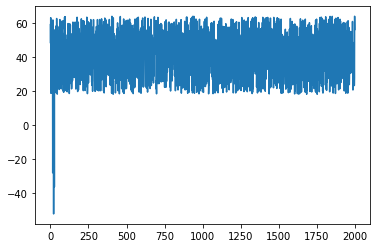

In [7]:
# visualização da variavel 'age' com valores negativos

dados['age'].plot();

In [8]:
# visualização da variavel 'age' com valores nulos

dados.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [9]:
# visualização da variavel 'age' com valores menores que 0

dados[dados['age'] <= 0]

,i#clientid,income,age,loan,c#default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [10]:
# Apagando os valores nulos da variavel 'age'

dados.dropna(inplace=True)

In [11]:
# visualização da variavel 'age' com valores nulos

dados.isnull().sum()

i#clientid    0
income        0
age           0
loan          0
c#default     0
dtype: int64

In [12]:
# remoção dos valores menores que 0 da variavel 'age'

dados = dados[dados['age'] >= 0]

In [13]:
# verificação dos valores da variavel 'age'

dados[dados['age'] <= 0]

,i#clientid,income,age,loan,c#default


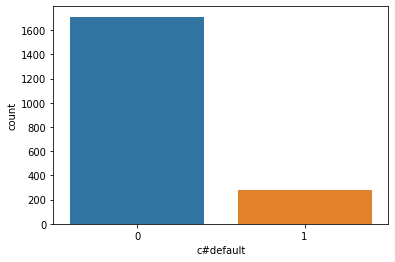

In [14]:
# visualização das classes de 'c#default'    0-> pagaram o emprestimo, 
#                                            1-> não pagam o emprestimo
sns.countplot(x='c#default', data=dados);

In [15]:
# classificação com base de dados desbalanceados

dados['c#default'].value_counts('1')       # quantidade de registros por percentual de cada classe

0    0.858074
1    0.141926
Name: c#default, dtype: float64

In [16]:
# definição das variaveis para classificação

X = dados.iloc[ : , 1:4].values             # variaveis de entrada
X.shape                                     # dimensões da variavel X

(1994, 3)

In [17]:
# Visualização da variavel X em formato de array

X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [18]:
# definição da variavel y saída

y = dados.iloc[ : , 4].values               # variavel de saida
y.shape                                     # dimensões da variavel y

(1994,)

In [19]:
# Visualização da variavel y em formato de array

y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [20]:
# base de treinamento dos dados

In [21]:
# divisão dos dados em conjunto de treino e teste usando a amostragem estratificada

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y)

In [22]:
# dimensões do conjunto de treino

X_treino.shape, y_treino.shape                              

((1595, 3), (1595,))

In [23]:
# dimensões do conjunto de teste

X_teste.shape, y_teste.shape       

((399, 3), (399,))

In [24]:
# Visualização da quantidade de registros por classe treino

np.unique(y_treino, return_counts=True)

(array([0, 1], dtype=int64), array([1369,  226], dtype=int64))

In [25]:
# Visualização da quantidade de registros por classe teste

np.unique(y_teste, return_counts=True)

(array([0, 1], dtype=int64), array([342,  57], dtype=int64))

In [26]:
# classificação com base de dados desbalanceados usando algoritmo naive bayes

In [27]:
# criação do modelo

modelo = GaussianNB()                     # definição do modelo na variável modelo
modelo.fit(X_treino, y_treino)            # treinamento do modelo 

GaussianNB()

In [28]:
# predição dos dados de teste com o modelo treinado

previsoes = modelo.predict(X_teste)

In [29]:
# visualização dos registros da previsão

previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [30]:
# visualização dos registros reais

y_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [31]:
# comparando os registros reais com as previsões

accuracy_score(previsoes, y_teste)

0.9223057644110275

In [32]:
# matriz de confusão comparando a qualidade dos registros reais com as previsões

cm = confusion_matrix(previsoes, y_teste)
cm

array([[330,  19],
       [ 12,  38]], dtype=int64)

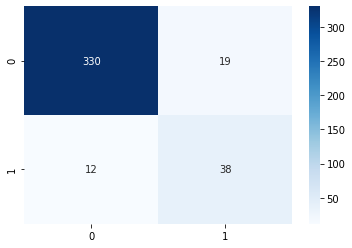

In [33]:
# visualização da matriz de confusão graficamente

cnn = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [34]:
# percentual de acerto do modelo das pessoas que pagam o emprestimo

336 / (336 + 25)

0.9307479224376731

In [35]:
# percentual de acerto do modelo das pessoas que não pagam o emprestimo

32 / (32 + 7)

0.8205128205128205

In [36]:
# Tecnica de subamostragem(undersampling) - Tomek links


tl = TomekLinks(sampling_strategy = 'majority')                 # apaga somente registros da classe majoritária(ratio = 'majority')
X_under, y_under = tl.fit_resample(X, y)

In [37]:
# Visualização da quantidade de registros

X_under.shape, y_under.shape

((1894, 3), (1894,))

In [38]:
# Visualização da quantidade de registros por classe da base de dados original

np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1711,  283], dtype=int64))

In [39]:
# Visualização da quantidade de registros por classe da base de dados com aplicação de subamostragem

np.unique(y_under, return_counts=True)

(array([0, 1], dtype=int64), array([1611,  283], dtype=int64))

In [40]:
# Novo modelo de classificação com nova base de dados
X_treino_u, X_teste_u, y_treino_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)

# Visualização da quantidade de registros
X_treino_u.shape, y_teste_u.shape

((1515, 3), (379,))

In [41]:
# criação do modelo

modelo_u = GaussianNB()                         # definição do modelo na variável modelo
modelo_u.fit(X_treino_u, y_treino_u)            # treinamento do modelo com a nova base de dados subamostrada

GaussianNB()

In [42]:
# predição dos dados de teste com o modelo treinado

previsoes_u = modelo_u.predict(X_teste_u)

In [43]:
# comparando os registros reais com as previsões

accuracy_score(previsoes_u, y_teste_u)

0.9340369393139841

In [44]:
# matriz de confusão comparando a qualidade dos registros reais com as previsões

cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[319,  22],
       [  3,  35]], dtype=int64)

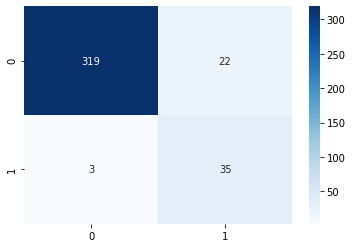

In [45]:
# visualização da matriz de confusão graficamente

cnn = sns.heatmap(cm_u, annot=True, fmt='d', cmap='Blues')

In [46]:
# percentual de acerto do modelo das pessoas que pagam o emprestimo

320 / (320 + 21)

0.9384164222873901

In [47]:
# percentual de acerto do modelo das pessoas que não pagam o emprestimo

36 / (36 + 2)

0.9473684210526315

In [48]:
# Tecnica de sobreamostragem(oversampling) - SMOTE

smote = SMOTE(sampling_strategy = 'minority')                 # aumenta somente registros da classe minoritária(ratio = 'minority')
X_over, y_over = smote.fit_resample(X, y)                     # aplicação da subamostragem na base de dados original

In [49]:
# Visualização da quantidade de registros

X_over.shape, y_over.shape

((3422, 3), (3422,))

In [50]:
# Visualização da quantidade de registros por classe da base de dados original

np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1711,  283], dtype=int64))

In [51]:
# Visualização da quantidade de registros por classe da base de dados aumetada

np.unique(y_over, return_counts=True)

(array([0, 1], dtype=int64), array([1711, 1711], dtype=int64))

In [52]:
# Novo modelo de classificação com nova base de dados
X_treino_o, X_teste_o, y_treino_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)

# Visualização da quantidade de registros
X_treino_o.shape, y_teste_o.shape

((2737, 3), (685,))

In [53]:
# criação do modelo

modelo_o = GaussianNB()                         # definição do modelo na variável modelo
modelo_o.fit(X_treino_o, y_treino_o)            # treinamento do modelo com a nova base de dados subamostrada

GaussianNB()

In [54]:
# predição dos dados de teste com o modelo treinado

previsoes_o = modelo_o.predict(X_teste_o)

In [55]:
# comparando os registros reais com as previsões

accuracy_score(previsoes_o, y_teste_o)

0.9211678832116789

In [ ]:
# matriz de confusão comparando a qualidade dos registros reais com as previsões

cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

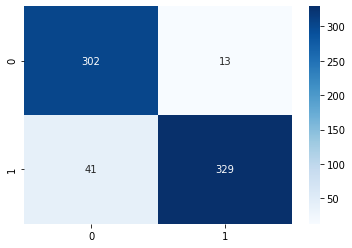

In [57]:
# visualização da matriz de confusão graficamente

cnn = sns.heatmap(cm_o, annot=True, fmt='d', cmap='Blues')

In [58]:
# percentual de acerto do modelo das pessoas que pagam o emprestimo

305 / (305 + 15)

0.953125

In [59]:
# percentual de acerto do modelo das pessoas que não pagam o emprestimo

327 / (327 + 38)

0.8958904109589041